## Filtragem arquivos transparência - Saúde

#### Carregando bibliotecas

In [1]:
import os
import glob
import openpyxl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set(style="white")

#### Funções auxiliares

In [3]:
def listar_arquivos(diretorio='Favorecidos', extensao='xlsx'):
    search = "input/{}/*.{}".format(diretorio, extensao)
    files = glob.glob(search)
    files.sort()
    return files

In [4]:
arquivos = listar_arquivos('Contratos')

In [5]:
arquivos

['input/Contratos/Open_Data_Contratos_2008.xlsx',
 'input/Contratos/Open_Data_Contratos_2009.xlsx',
 'input/Contratos/Open_Data_Contratos_2010.xlsx',
 'input/Contratos/Open_Data_Contratos_2011.xlsx',
 'input/Contratos/Open_Data_Contratos_2012.xlsx',
 'input/Contratos/Open_Data_Contratos_2013.xlsx',
 'input/Contratos/Open_Data_Contratos_2014.xlsx',
 'input/Contratos/Open_Data_Contratos_2015.xlsx',
 'input/Contratos/Open_Data_Contratos_2016.xlsx',
 'input/Contratos/Open_Data_Contratos_2017.xlsx',
 'input/Contratos/Open_Data_Contratos_2018.xlsx',
 'input/Contratos/Open_Data_Contratos_2019.xlsx']

#### Filtrando os dados referentes à saúde (Secretaria Municipal de Saúde e Fundo de Assistência à Saúde)

In [6]:
dff = pd.DataFrame()
for arquivo in arquivos:
    df = pd.read_excel(arquivo, sheet_name='Plan1')
    # SECRETARIA MUNICIPAL DE SAÚDE = 1800 e FUNDO DE ASSISTÊNCIA À SAÚDE = 1333
    df = df[(df['Órgão executor'] == 1800) | (df['Órgão executor'] == 1333)]
    dff = dff.append(df)

In [7]:
len(dff)

2674

In [8]:
len(dff['Código favorecido'].unique())

809

#### Análise dos Favorecidos por ano

In [9]:
aggregations = {
    'Favorecido': 'first',
    'Valor Instrumento': 'sum',
    'Valor do acréscimo ou redução': 'sum',
    'Saldo do instrumento': 'sum',
    'Saldo executado': 'sum',
    'Valor empenhado': 'sum',
    'Valor liquidado': 'sum',
    'Valor pago': 'sum'
}
dff1 = dff.groupby(['Ano instrumento', 'Código favorecido']).agg(aggregations)
dff1.reset_index(inplace=True)

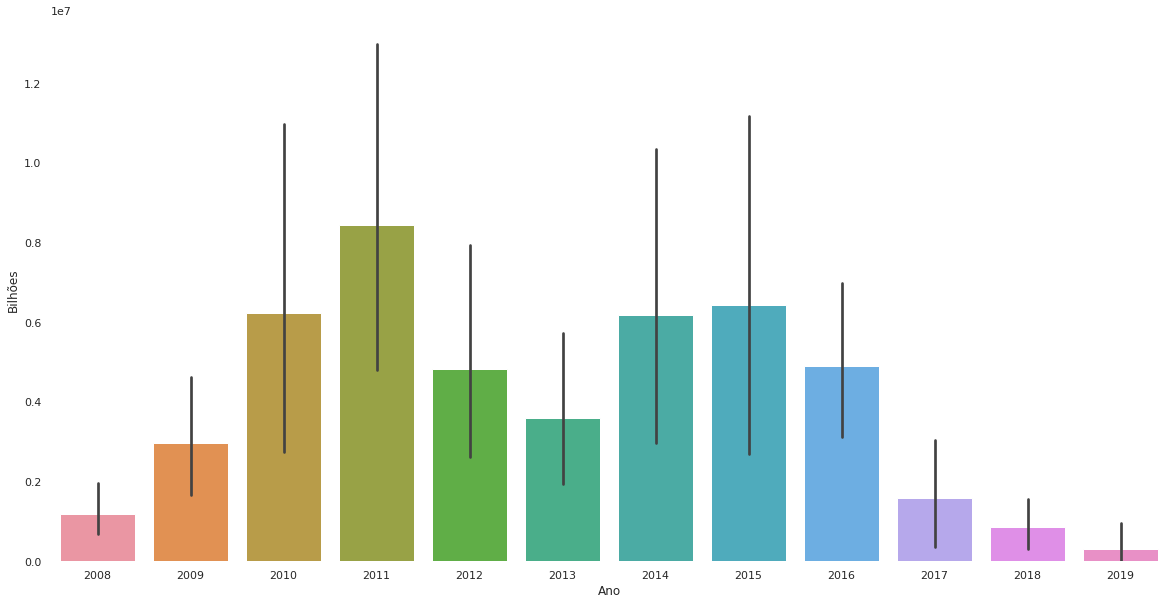

In [10]:
fig, ax1 = plt.subplots(figsize=(20, 10))
sns.barplot(x="Ano instrumento", y="Valor pago", data=dff1, ax=ax1)
ax1.set(ylabel="Bilhões", xlabel="Ano")
sns.despine(left=True, bottom=True)

#### Análise de valores e quantidades de Contratos efetuados anualmente

In [11]:
aggregations = {
    'Valor pago': 'sum',
    'Código favorecido': 'count'
}
dff2 = dff.groupby('Ano instrumento').agg(aggregations)
dff2.reset_index(inplace=True)

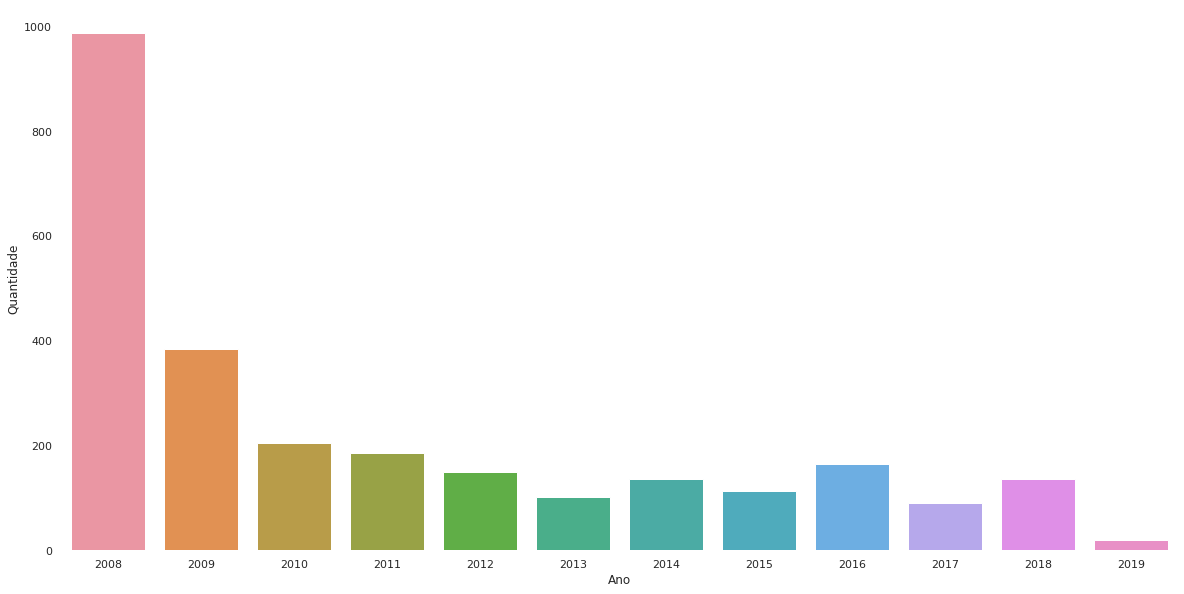

In [12]:
fig, ax1 = plt.subplots(figsize=(20, 10))
sns.barplot(x="Ano instrumento", y="Código favorecido", data=dff2, ax=ax1)
ax1.set(ylabel="Quantidade", xlabel="Ano")
sns.despine(left=True, bottom=True)

#### Exportando resultados gerais

In [13]:
with pd.ExcelWriter('output/gastos_totais_saude.xlsx') as writer:
    dff1.to_excel(writer, sheet_name='detalhado')
    dff2.to_excel(writer, sheet_name='anual')

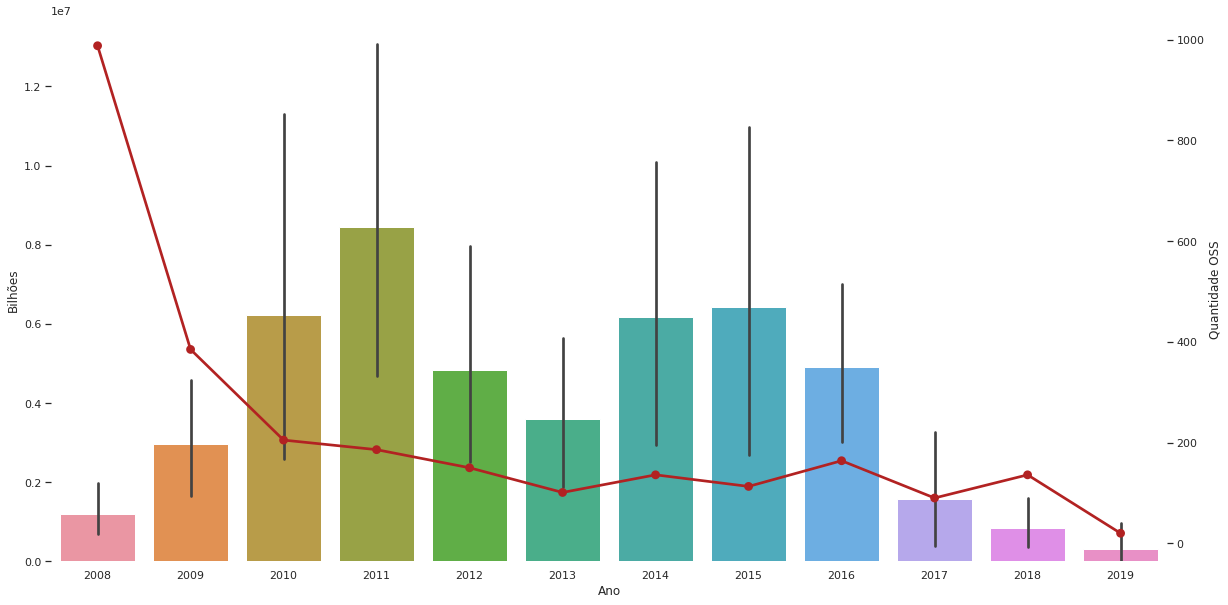

In [14]:
fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()
sns.barplot(x="Ano instrumento", y="Valor pago", data=dff1, ax=ax1)
sns.pointplot(x="Ano instrumento", y="Código favorecido", data=dff2, color="#B22222", ax=ax2)
ax1.set(ylabel="Bilhões", xlabel="Ano")
ax2.set(ylabel="Quantidade OSS")
sns.despine(left=True, bottom=True)

#### CNPJs específicos das OSS - obtidas através do site da Prefeitura do Rio

In [15]:
codigos = [
    2385669000174,
    9652823000176,
    61699567000192,
    24232886000167,
    343941000128,
    8882456000134,
    33981408000140,
    27774561000102,
    31104896000182,
    33005638000174,
    6942340000118,
    5153789000134,
    2833927377000140,
    42375097000167,
    48211585000115,
    5696218000146,
    2158304200084,
    7345851000115,
    33722224000166,
    7813739000161,
    10635117000103,
    66518267000183
]

In [16]:
dff = dff[dff['Código favorecido'].isin(codigos)]

In [17]:
len(dff)

73

#### Análise das OSS por ano

In [18]:
aggregations = {
    'Favorecido': 'first',
    'Valor Instrumento': 'sum',
    'Valor do acréscimo ou redução': 'sum',
    'Saldo do instrumento': 'sum',
    'Saldo executado': 'sum',
    'Valor empenhado': 'sum',
    'Valor liquidado': 'sum',
    'Valor pago': 'sum'
}
dff3 = dff.groupby(['Ano instrumento', 'Código favorecido']).agg(aggregations)
dff3.reset_index(inplace=True)

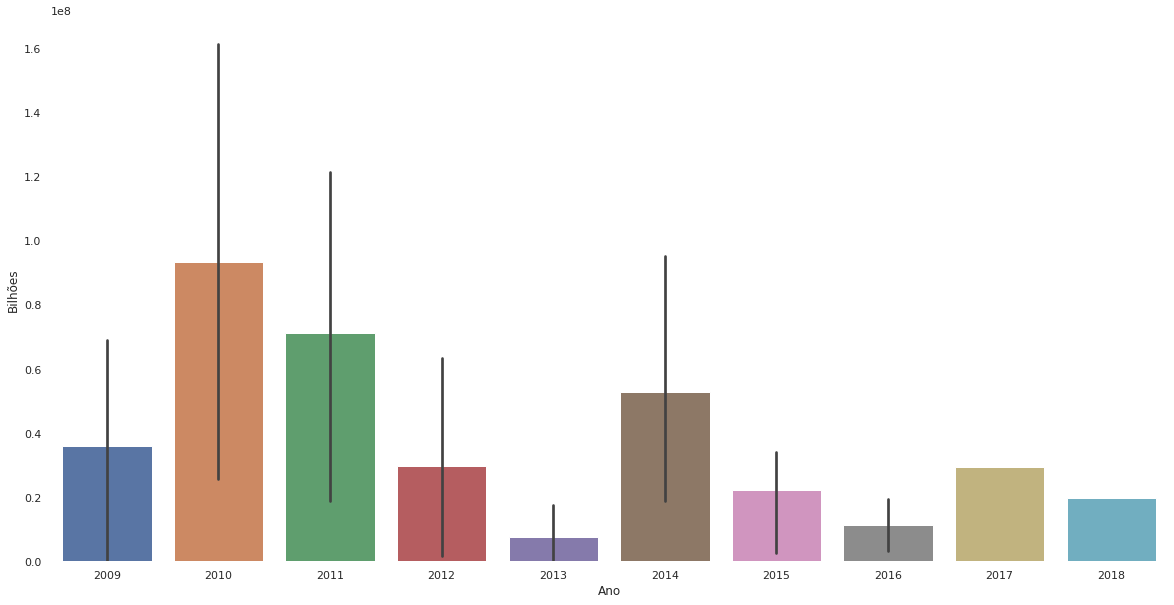

In [19]:
fig, ax1 = plt.subplots(figsize=(20, 10))
sns.barplot(x="Ano instrumento", y="Valor pago", data=dff3, ax=ax1)
ax1.set(ylabel="Bilhões", xlabel="Ano")
sns.despine(left=True, bottom=True)

#### Análise de valores e quantidades de Contratos efetuados anualmente com OSS

In [20]:
aggregations = {
    'Valor pago': 'sum',
    'Código favorecido': 'count'
}
dff4 = dff.groupby('Ano instrumento').agg(aggregations)
dff4.reset_index(inplace=True)

In [21]:
dff4

,Ano instrumento,Valor pago,Código favorecido
0,2009,1.080966e+08,4
1,2010,3.731589e+08,16
2,2011,3.566676e+08,13
3,2012,1.194341e+08,8
4,2013,2.293254e+07,7
5,2014,2.117883e+08,9
6,2015,6.635670e+07,4
7,2016,5.645785e+07,10
8,2017,2.945085e+07,1
9,2018,1.970684e+07,1


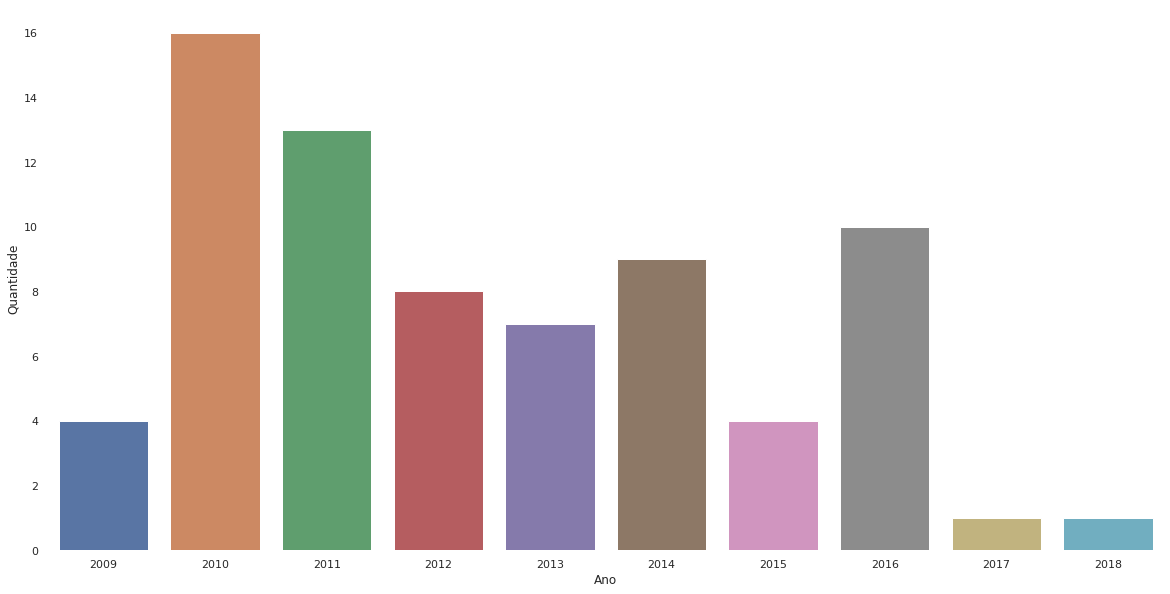

In [22]:
fig, ax1 = plt.subplots(figsize=(20, 10))
sns.barplot(x="Ano instrumento", y="Código favorecido", data=dff4, ax=ax1)
ax1.set(ylabel="Quantidade", xlabel="Ano")
sns.despine(left=True, bottom=True)

#### Exportando resultados específicos de OSS

In [23]:
with pd.ExcelWriter('output/gastos_os_saude.xlsx') as writer:
    dff3.to_excel(writer, sheet_name='detalhado')
    dff4.to_excel(writer, sheet_name='anual')

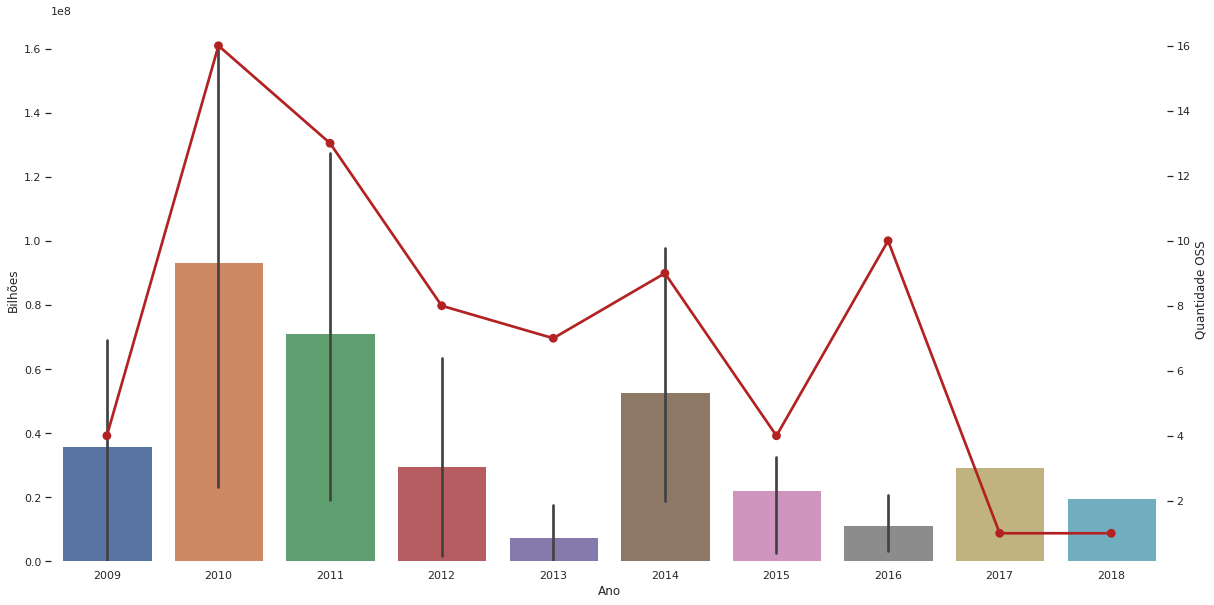

In [24]:
fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()
sns.barplot(x="Ano instrumento", y="Valor pago", data=dff3, ax=ax1)
sns.pointplot(x="Ano instrumento", y="Código favorecido", data=dff4, color="#B22222", ax=ax2)
ax1.set(ylabel="Bilhões", xlabel="Ano")
ax2.set(ylabel="Quantidade OSS")
sns.despine(left=True, bottom=True)